<a href="https://colab.research.google.com/github/2k0v11/WebScrapping/blob/main/Amazon_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup as bs
#bs4 is a package and BeautifulSoup is a Library


In [2]:
url='https://www.amazon.in/Samsung-Galaxy-Ultra-Phantom-Storage/product-reviews/B0BT9FDZ8N/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
page=requests.get(url) #the requests library is requesting for the url to be fethed
page                   #response[200]-all okay,response[503]-check for proper url

<Response [200]>

In [ ]:
soup= bs(page.content,'html.parser')
soup #soup variable has the full source code of the webpage
     #html.parser - displays our code in a better readable format


In [5]:
names=soup.find_all('span',class_ ='a-profile-name')[2:]
names
#Removed the top-positive and top-critical review

[<span class="a-profile-name">Aditya Sharma</span>,
 <span class="a-profile-name">Aditya Sharma</span>,
 <span class="a-profile-name">Sukoon Sharma</span>,
 <span class="a-profile-name">GMSPun</span>,
 <span class="a-profile-name">Farcry3413</span>,
 <span class="a-profile-name">Karmicfruits</span>,
 <span class="a-profile-name">Sammy</span>,
 <span class="a-profile-name">Sammy</span>,
 <span class="a-profile-name">pranay b bhoir</span>,
 <span class="a-profile-name">amit</span>,
 <span class="a-profile-name">amit</span>,
 <span class="a-profile-name">Bose</span>,
 <span class="a-profile-name">Niteesh</span>]

In [6]:
import pandas as pd
df=pd.DataFrame(names,columns= ['Customer name'])
df

,Customer name
0,Aditya Sharma
1,Aditya Sharma
2,Sukoon Sharma
3,GMSPun
4,Farcry3413
5,Karmicfruits
6,Sammy
7,Sammy
8,pranay b bhoir
9,amit


In [7]:
df=df.drop_duplicates(ignore_index=True)
df

,Customer name
0,Aditya Sharma
1,Sukoon Sharma
2,GMSPun
3,Farcry3413
4,Karmicfruits
5,Sammy
6,pranay b bhoir
7,amit
8,Bose
9,Niteesh


In [8]:
r_title=soup.find_all('a',class_='review-title')
r_title

[<a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R2QZSLVWHDNM4J?ASIN=B0BT9FDZ8N"><i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i><span class="a-letter-space"></span>
 <span>The best smartphone money can buy!</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R2M44U1C1YIK1L?ASIN=B0BT9FDZ8N"><i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i><span class="a-letter-space"></span>
 <span>This is the best Android has to offer</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R3F0PIGUD98QE6?ASIN=B0BT

In [9]:
len(r_title)

10

In [10]:
review_title=[]
for i in range(0,len(r_title)):
 review_title.append(r_title[i].get_text().replace(".0 out of 5 stars",'')[2:-1]) #[2:-1] is done to remove the '\n' at the begining and end of each review in html text
review_title

['The best smartphone money can buy!',
 'This is the best Android has to offer',
 'Excellent product',
 'Best phone in 2023',
 'Amazing phone but oversharpened images.',
 "Moon Picture wasn't Hyped",
 'Good phone , compared for pixel 7 pro and apple 14 pro.',
 'SIX MONTH LATER USE REVIEW',
 'Best in the market',
 'Good']

In [11]:
date=soup.find_all('span',class_='review-date')[2:]
date

[<span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India on 7 May 2023</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India on 2 December 2023</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India on 10 May 2024</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India on 20 July 2023</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India on 7 November 2023</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India on 22 February 2024</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India on 7 May 2023</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in India on 3 February 2024</span>,
 <span c

In [12]:
review_date=[]
for i in range(0,len(date)):
  review_date.append(date[i].get_text().replace("Reviewed in India 🇮🇳 on ",''))
review_date

['Reviewed in India on 7 May 2023',
 'Reviewed in India on 2 December 2023',
 'Reviewed in India on 10 May 2024',
 'Reviewed in India on 20 July 2023',
 'Reviewed in India on 7 November 2023',
 'Reviewed in India on 22 February 2024',
 'Reviewed in India on 7 May 2023',
 'Reviewed in India on 3 February 2024',
 'Reviewed in India on 3 January 2024',
 'Reviewed in India on 30 November 2023']

In [13]:
r_rating=soup.find_all('i',class_='review-rating')[2:]
r_rating

[<i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-4 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">4.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-

In [14]:
review_rating=[]
for i in range(0,len(r_rating)):
  review_rating.append(r_rating[i].get_text())
review_rating

['5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '3.0 out of 5 stars',
 '5.0 out of 5 stars',
 '4.0 out of 5 stars']

In [15]:
len(review_rating)

10

In [16]:
r_content=soup.find_all('span',class_='review-text-content')
r_content

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>After using Samsung Galaxy S23 Ultra for quite a bit as a daily driver and coming back to Samsung after a long time after using other smaller form factor phones like ONEPLUS 9, here's what I think about this phone.<br/><br/>PROS:<br/><br/>- This phone has the best camera ever installed into a smartphone, hands-down! No other phone made in human history can ever come close to 1% of what Samsung Galaxy S23 Ultra's cameras can do.<br/><br/>- Performance is crazy! Not only it has Snapdragon 8Gen-2, but that too custom-made for Samsung Galaxy phones. You can play any games, run any apps and do whatever you'd want from a phone that is used at work, gaming, taking photos/videos and for personal use at the same time.<br/><br/>- Rectangular form factor of this phone makes it so much comfortable and easy to hold. And it looks very premium too, which obviously is expected from a phone that costs this much.<

In [17]:
review_content=[]
for i in range(0,len(r_content)):
  review_content.append(r_content[i].get_text().replace('\n',''))
review_content

['After using Samsung Galaxy S23 Ultra for quite a bit as a daily driver and coming back to Samsung after a long time after using other smaller form factor phones like ONEPLUS 9, here\'s what I think about this phone.PROS:- This phone has the best camera ever installed into a smartphone, hands-down! No other phone made in human history can ever come close to 1% of what Samsung Galaxy S23 Ultra\'s cameras can do.- Performance is crazy! Not only it has Snapdragon 8Gen-2, but that too custom-made for Samsung Galaxy phones. You can play any games, run any apps and do whatever you\'d want from a phone that is used at work, gaming, taking photos/videos and for personal use at the same time.- Rectangular form factor of this phone makes it so much comfortable and easy to hold. And it looks very premium too, which obviously is expected from a phone that costs this much.- OneUI has so many great features that they cannot be listed in one place. It brings a whole new meaning to "smart" in smartph

In [18]:
len(review_content)

10

In [19]:
df['Review Title']=review_title
df['Review Date']= review_date
df['Review Rating']=review_rating
df['Review Content']=review_content

C:\Users\kavya\AppData\Local\Temp\ipykernel_6164\723966687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Title']=review_title
C:\Users\kavya\AppData\Local\Temp\ipykernel_6164\723966687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Date']= review_date
C:\Users\kavya\AppData\Local\Temp\ipykernel_6164\723966687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [20]:
df

,Customer name,Review Title,Review Date,Review Rating,Review Content
0,Aditya Sharma,The best smartphone money can buy!,Reviewed in India on 7 May 2023,5.0 out of 5 stars,After using Samsung Galaxy S23 Ultra for quite...
1,Sukoon Sharma,This is the best Android has to offer,Reviewed in India on 2 December 2023,5.0 out of 5 stars,I'll keep it short and direct.-Great in hand f...
2,GMSPun,Excellent product,Reviewed in India on 10 May 2024,5.0 out of 5 stars,If you are Samsung fan. if you love the punchy...
3,Farcry3413,Best phone in 2023,Reviewed in India on 20 July 2023,5.0 out of 5 stars,This phone is very good allrounder with very b...
4,Karmicfruits,Amazing phone but oversharpened images.,Reviewed in India on 7 November 2023,4.0 out of 5 stars,"First of all, this was my last smartphone purc..."
5,Sammy,Moon Picture wasn't Hyped,Reviewed in India on 22 February 2024,5.0 out of 5 stars,The phone is fine so far. The moon picture was...
6,pranay b bhoir,"Good phone , compared for pixel 7 pro and appl...",Reviewed in India on 7 May 2023,5.0 out of 5 stars,I was samsung follower sing samsung galaxy ser...
7,amit,SIX MONTH LATER USE REVIEW,Reviewed in India on 3 February 2024,3.0 out of 5 stars,Mobile is stuck some time . some time corner t...
8,Bose,Best in the market,Reviewed in India on 3 January 2024,5.0 out of 5 stars,Never been an apple fan. So in the android wor...
9,Niteesh,Good,Reviewed in India on 30 November 2023,4.0 out of 5 stars,High price


In [21]:
import csv
df.to_csv('Amazon_reviews.csv',index=False)


In [23]:
import pandas as pd
df1=pd.read_csv('Amazon_reviews.csv')
df1

,Customer name,Review Title,Review Date,Review Rating,Review Content
0,Aditya Sharma,The best smartphone money can buy!,Reviewed in India on 7 May 2023,5.0 out of 5 stars,After using Samsung Galaxy S23 Ultra for quite...
1,Sukoon Sharma,This is the best Android has to offer,Reviewed in India on 2 December 2023,5.0 out of 5 stars,I'll keep it short and direct.-Great in hand f...
2,GMSPun,Excellent product,Reviewed in India on 10 May 2024,5.0 out of 5 stars,If you are Samsung fan. if you love the punchy...
3,Farcry3413,Best phone in 2023,Reviewed in India on 20 July 2023,5.0 out of 5 stars,This phone is very good allrounder with very b...
4,Karmicfruits,Amazing phone but oversharpened images.,Reviewed in India on 7 November 2023,4.0 out of 5 stars,"First of all, this was my last smartphone purc..."
5,Sammy,Moon Picture wasn't Hyped,Reviewed in India on 22 February 2024,5.0 out of 5 stars,The phone is fine so far. The moon picture was...
6,pranay b bhoir,"Good phone , compared for pixel 7 pro and appl...",Reviewed in India on 7 May 2023,5.0 out of 5 stars,I was samsung follower sing samsung galaxy ser...
7,amit,SIX MONTH LATER USE REVIEW,Reviewed in India on 3 February 2024,3.0 out of 5 stars,Mobile is stuck some time . some time corner t...
8,Bose,Best in the market,Reviewed in India on 3 January 2024,5.0 out of 5 stars,Never been an apple fan. So in the android wor...
9,Niteesh,Good,Reviewed in India on 30 November 2023,4.0 out of 5 stars,High price


In [24]:
import matplotlib.pyplot as plt
rating_counts=df1['Review Rating'].value_counts()
rating_counts


5.0 out of 5 stars    7
4.0 out of 5 stars    2
3.0 out of 5 stars    1
Name: Review Rating, dtype: int64

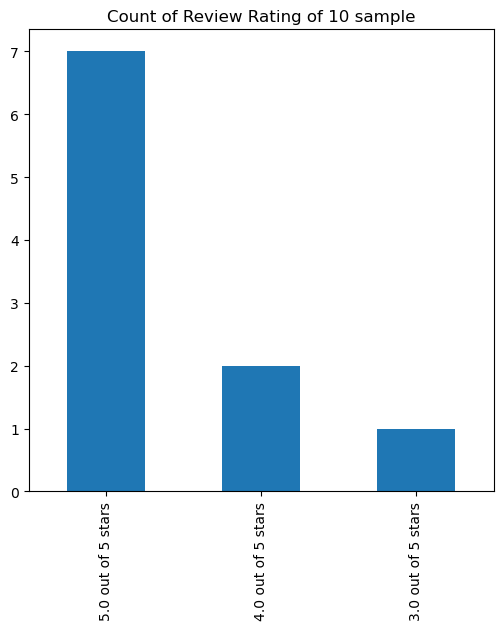

In [25]:
plt.figure(figsize=(6,6))
rating_counts.plot(kind='bar')
plt.title('Count of Review Rating of 10 sample')
plt.show()

In [26]:
# Sentiment Analysis
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kavya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
# VADER Sentiment Analysis
sia = SentimentIntensityAnalyzer()

In [28]:
# Apply VADER to the reviews
vader_results = []
for review in tqdm(df1['Review Content']):
    vader_results.append(sia.polarity_scores(review))

  0%|          | 0/10 [00:00<?, ?it/s]

In [29]:
vader_df = pd.DataFrame(vader_results)
df1 = pd.concat([df1, vader_df], axis=1)

In [30]:
# Calculate VADER polarization
df1['vader_polarization'] = df1['pos'] - df1['neg']

In [31]:
# RoBERTa Sentiment Analysis
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [32]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }

In [36]:
# Save combined data to CSV
df1.to_csv('Amazon_reviews_with_sentiment.csv', index=False)

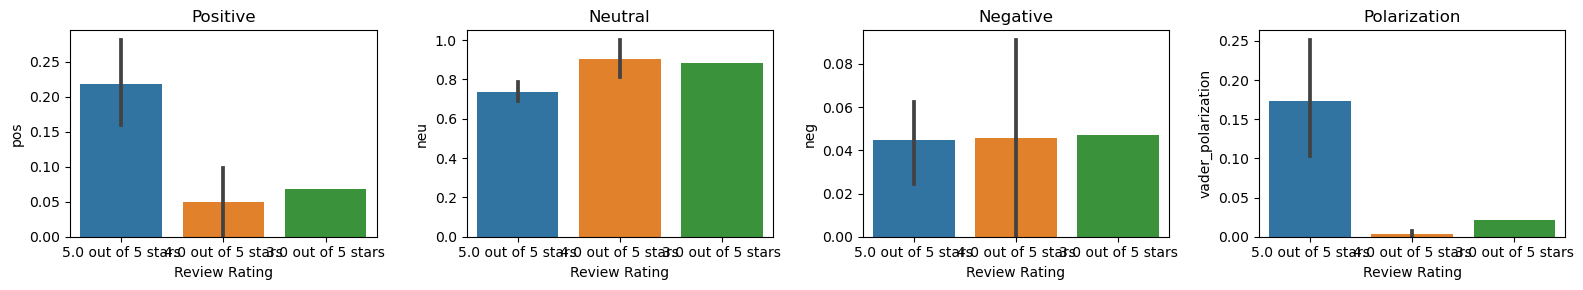

In [37]:
# Visualize the results
import seaborn as sns

# Plot VADER results
fig, axs = plt.subplots(1, 4, figsize=(16, 3))
sns.barplot(data=df1, x='Review Rating', y='pos', ax=axs[0])
sns.barplot(data=df1, x='Review Rating', y='neu', ax=axs[1])
sns.barplot(data=df1, x='Review Rating', y='neg', ax=axs[2])
sns.barplot(data=df1, x='Review Rating', y='vader_polarization', ax=axs[3])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[3].set_title('Polarization')
plt.tight_layout()
plt.show()